In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("WIPRO.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Normalised
0,2021-04-01,418.850006,422.850006,414.350006,416.399994,410.402557,7596943,0.164796
1,2021-04-05,416.450012,427.899994,416.200012,425.450012,419.322205,21216395,0.189570
2,2021-04-06,427.950012,428.899994,422.350006,427.149994,420.997742,8320520,0.194224
3,2021-04-07,425.000000,439.000000,423.399994,438.000000,431.691467,13867650,0.223926
4,2021-04-08,441.950012,445.950012,440.000000,442.100006,435.732452,12916614,0.235149


In [4]:
df1=df[['Date','Close']]

In [5]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Normalised    float64
dtype: object

In [6]:
df1

,Date,Close
0,2021-04-01,416.399994
1,2021-04-05,425.450012
2,2021-04-06,427.149994
3,2021-04-07,438.000000
4,2021-04-08,442.100006
...,...,...
755,2024-04-24,459.899994
756,2024-04-25,461.000000
757,2024-04-26,464.600006
758,2024-04-29,462.950012


In [7]:
 df1=df.reset_index()['Close']

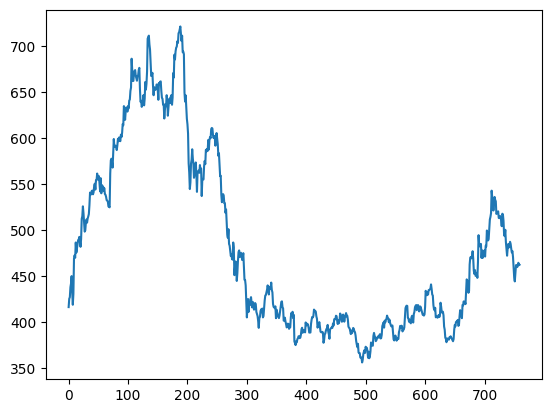

In [8]:
plt.plot(df1)

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df['Normalised'] = df1

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Normalised
0,2021-04-01,418.850006,422.850006,414.350006,416.399994,410.402557,7596943,0.164796
1,2021-04-05,416.450012,427.899994,416.200012,425.450012,419.322205,21216395,0.189570
2,2021-04-06,427.950012,428.899994,422.350006,427.149994,420.997742,8320520,0.194224
3,2021-04-07,425.000000,439.000000,423.399994,438.000000,431.691467,13867650,0.223926
4,2021-04-08,441.950012,445.950012,440.000000,442.100006,435.732452,12916614,0.235149


In [11]:
df.to_csv("WIPRO.csv", index = False)

In [12]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size 
test_size  
df.size  

6080

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
X_train

array([[0.16479601, 0.18957022, 0.19422388, ..., 0.17177663, 0.20394197,
        0.3093348 ],
       [0.18957022, 0.19422388, 0.22392551, ..., 0.20394197, 0.3093348 ,
        0.31905281],
       [0.19422388, 0.22392551, 0.23514918, ..., 0.3093348 , 0.31905281,
        0.31179852],
       ...,
       [0.1546674 , 0.14645497, 0.14193807, ..., 0.21324937, 0.20709005,
        0.20010944],
       [0.14645497, 0.14193807, 0.14207499, ..., 0.20709005, 0.20010944,
        0.20982753],
       [0.14193807, 0.14207499, 0.13961128, ..., 0.20010944, 0.20982753,
        0.20202571]])

In [17]:
X_train[1]
X_train.shape

(597, 10)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
X_train.shape

(597, 10, 1)

In [20]:
2+2

4

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\Diya\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1293 - val_loss: 0.0050
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0138 - val_loss: 0.0032
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

Epoch 69/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 70/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 71/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4986e-04 - val_loss: 0.0011
Epoch 72/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 73/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 74/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 75/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 76/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1182e-04 - val_loss: 0.0011
Epoch 77/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3200e-04 - val_loss: 0.0011
Epoch 78/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.7495e-04 - val_loss: 0.0011
Epoch 79/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6863e-04 - val_loss: 0.0011
Epoch 80/100
19/19 ━━━━━━

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,555 (595.92 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,704 (397.29 KB)

In [27]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [28]:
scaler.inverse_transform(train_predict)

array([[436.9098 ],
       [447.74802],
       [458.27112],
       [469.5942 ],
       [476.248  ],
       [479.77112],
       [482.3615 ],
       [485.09647],
       [487.4872 ],
       [490.0034 ],
       [490.56155],
       [488.36664],
       [487.8794 ],
       [494.68332],
       [504.1283 ],
       [515.25964],
       [521.579  ],
       [520.1874 ],
       [513.0198 ],
       [506.20734],
       [504.27527],
       [506.21725],
       [508.1631 ],
       [510.75388],
       [513.52325],
       [516.4212 ],
       [521.5874 ],
       [530.7985 ],
       [538.2944 ],
       [542.5926 ],
       [545.46906],
       [546.94653],
       [545.8899 ],
       [544.9339 ],
       [546.98346],
       [550.46124],
       [550.8232 ],
       [553.5117 ],
       [556.3111 ],
       [560.9347 ],
       [563.1945 ],
       [562.5458 ],
       [562.3762 ],
       [558.99524],
       [552.5746 ],
       [552.93475],
       [549.5448 ],
       [549.15765],
       [549.599  ],
       [550.12866],


In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [30]:
train_predict

array([[0.2209411 ],
       [0.25061053],
       [0.27941722],
       [0.31041393],
       [0.32862845],
       [0.33827293],
       [0.34536412],
       [0.3528509 ],
       [0.35939553],
       [0.36628363],
       [0.36781153],
       [0.36180294],
       [0.3604692 ],
       [0.37909478],
       [0.4049502 ],
       [0.43542203],
       [0.45272103],
       [0.44891146],
       [0.42929035],
       [0.41064146],
       [0.40535253],
       [0.41066864],
       [0.41599524],
       [0.42308754],
       [0.43066865],
       [0.43860164],
       [0.45274404],
       [0.47795925],
       [0.49847904],
       [0.51024526],
       [0.5181195 ],
       [0.52216405],
       [0.5192715 ],
       [0.5166545 ],
       [0.52226514],
       [0.5317855 ],
       [0.5327763 ],
       [0.540136  ],
       [0.5477992 ],
       [0.56045634],
       [0.5666426 ],
       [0.5648666 ],
       [0.56440246],
       [0.55514705],
       [0.5375706 ],
       [0.5385567 ],
       [0.5292768 ],
       [0.528

In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
train_predict

array([[436.9098 ],
       [447.74802],
       [458.27112],
       [469.5942 ],
       [476.248  ],
       [479.77112],
       [482.3615 ],
       [485.09647],
       [487.4872 ],
       [490.0034 ],
       [490.56155],
       [488.36664],
       [487.8794 ],
       [494.68332],
       [504.1283 ],
       [515.25964],
       [521.579  ],
       [520.1874 ],
       [513.0198 ],
       [506.20734],
       [504.27527],
       [506.21725],
       [508.1631 ],
       [510.75388],
       [513.52325],
       [516.4212 ],
       [521.5874 ],
       [530.7985 ],
       [538.2944 ],
       [542.5926 ],
       [545.46906],
       [546.94653],
       [545.8899 ],
       [544.9339 ],
       [546.98346],
       [550.46124],
       [550.8232 ],
       [553.5117 ],
       [556.3111 ],
       [560.9347 ],
       [563.1945 ],
       [562.5458 ],
       [562.3762 ],
       [558.99524],
       [552.5746 ],
       [552.93475],
       [549.5448 ],
       [549.15765],
       [549.599  ],
       [550.12866],


In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

502.1790169011233

In [33]:
print(train_predict.shape)
print(X_train.shape)
print(scaler.data_min_.shape)

(597, 1)
(597, 10, 1)
(1,)


In [34]:

math.sqrt(mean_squared_error(ytest,test_predict))

454.43290310491255

In [35]:
len(test_data)
len(train_data)

608

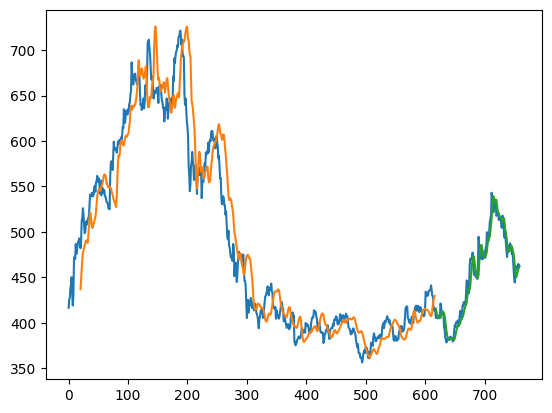

In [36]:
# shift train predictions for plotting
look_back=20
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*1)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
x_input=test_data[132:].reshape(1,-1)
x_input.shape

(1, 20)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.3001114]
21
1 day input [0.34218452 0.34765947 0.35915682 0.35272373 0.33862575 0.32740208
 0.33150829 0.31357786 0.28237065 0.25225841 0.2413085  0.26430329
 0.28962494 0.28989871 0.28387623 0.28688747 0.2967424  0.29222558
 0.29071992 0.30011141]
1 day output [[0.30159086]]
2 day input [0.34765947 0.35915682 0.35272373 0.33862575 0.32740208 0.33150829
 0.31357786 0.28237065 0.25225841 0.2413085  0.26430329 0.28962494
 0.28989871 0.28387623 0.28688747 0.2967424  0.29222558 0.29071992
 0.30011141 0.30159086]
2 day output [[0.30376947]]
3 day input [0.35915682 0.35272373 0.33862575 0.32740208 0.33150829 0.31357786
 0.28237065 0.25225841 0.2413085  0.26430329 0.28962494 0.28989871
 0.28387623 0.28688747 0.2967424  0.29222558 0.29071992 0.30011141
 0.30159086 0.30376947]
3 day output [[0.30623582]]
4 day input [0.35272373 0.33862575 0.32740208 0.33150829 0.31357786 0.28237065
 0.25225841 0.2413085  0.26430329 0.28962494 0.28989871 0.28387623
 0.28688747 0.2967424  0.29222558 0.29071992

In [40]:
lst_output = scaler.inverse_transform(lst_output)

In [41]:
lst_output

array([[465.83070771],
       [466.37114964],
       [467.16699562],
       [468.06795353],
       [469.00531687],
       [469.9620478 ],
       [470.93906081],
       [471.94101546],
       [472.97162414],
       [474.03703787],
       [475.14034851],
       [476.28213307],
       [477.46153147],
       [478.67838043],
       [479.9361637 ],
       [481.23883321],
       [482.58776068],
       [483.98413277],
       [485.43043167],
       [486.93023913],
       [488.48578695],
       [490.09992746],
       [491.77677587],
       [493.51994659],
       [495.33344596],
       [497.22168313],
       [499.18945918],
       [501.24194532],
       [503.38478092],
       [505.62398636]])

In [42]:
import yfinance as yf

In [49]:
from datetime import datetime, timedelta

In [83]:
start_date = "2024-06-03"
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")

# Calculate the end date by adding 30 days
end_date_dt = start_date_dt + timedelta(days=30)

# Convert the end date back to a string if needed
end_date = end_date_dt.strftime("%Y-%m-%d")

In [84]:
tkr = yf.Ticker("WIPRO.NS")
tkrdf = yf.download("WIPRO.NS",start_date,end_date)

[*********************100%%**********************]  1 of 1 completed


In [85]:
tkrdf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,450.200012,450.549988,441.549988,444.100006,444.100006,4482212
2024-06-04,445.899994,445.899994,417.000000,438.149994,438.149994,8865366
2024-06-05,439.700012,455.000000,439.049988,451.500000,451.500000,6133714
2024-06-06,454.950012,462.000000,452.600006,461.000000,461.000000,7712784
2024-06-07,470.000000,486.399994,468.299988,484.549988,484.549988,36336220
2024-06-10,488.399994,488.399994,473.350006,475.250000,475.250000,9155876
2024-06-11,479.200012,479.200012,474.350006,476.049988,476.049988,4685857
2024-06-12,478.000000,484.399994,475.549988,476.899994,476.899994,6937558
2024-06-13,480.000000,485.350006,478.149994,482.600006,482.600006,6497966


In [86]:
type(tkrdf) #pd df
type(lst_output)  #numpy ndarray

numpy.ndarray

In [87]:
tkrdf = tkrdf[['Close']]
tkrdf
len(tkrdf)

21

In [88]:
fore = tkrdf['Close'].tolist()

In [89]:
fore

[444.1000061035156,
 438.1499938964844,
 451.5,
 461.0,
 484.54998779296875,
 475.25,
 476.04998779296875,
 476.8999938964844,
 482.6000061035156,
 477.5,
 491.8500061035156,
 495.75,
 490.3999938964844,
 490.54998779296875,
 490.54998779296875,
 496.8500061035156,
 495.20001220703125,
 510.79998779296875,
 514.8499755859375,
 527.3499755859375,
 538.2000122070312]

In [95]:
lst_output_truncated = lst_output[:21]

In [96]:
predicted = np.array(lst_output_truncated)
true = np.array(fore)

In [97]:
rmse = np.sqrt(np.mean((predicted - true) ** 2))
mape = np.mean(np.abs((true - predicted) / true)) * 100

In [98]:
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")   #mape less than 4.43%.. high accuracy

RMSE: 27.404935792365666
MAPE: 4.439317477012565%
